In [4]:
import numpy as np
import os
import sys
sys.path.append(os.getenv("EPOCH_SIMS_HOME"))
from plot_helper import animate_field
from configs.config import *
%config InlineBackend.figure_format = 'retina'

In [29]:
epoch_output_dir

'/fs/ess/scratch/PAS2137/wang15032/EpochOutput/2023-08-10_3D_8CB_800nm_1e21_22deg'

In [30]:
import sdf_helper as sh

# load PMovie data
p_movie = sh.getdata(os.path.join(epoch_output_dir, 'pmovie_0276.sdf'), verbose=False)
sh.list_variables(p_movie)

Grid_Particles_subset_CarbonPMovie_Carbon <class 'sdf.BlockPointMesh'> [15086544, 15086544, 15086544]
Grid_Particles_subset_ElectronPMovie_Electron <class 'sdf.BlockPointMesh'> [40491816, 40491816, 40491816]
Grid_Particles_subset_HighEnergyTNSAProtons_Proton <class 'sdf.BlockPointMesh'> [453876, 453876, 453876]
Grid_Particles_subset_ProtonPMovie_Proton <class 'sdf.BlockPointMesh'> [80299518, 80299518, 80299518]
Particles_ID_subset_CarbonPMovie_Carbon <class 'sdf.BlockPointVariable'> [15086544]
Particles_ID_subset_ElectronPMovie_Electron <class 'sdf.BlockPointVariable'> [40491816]
Particles_ID_subset_HighEnergyTNSAProtons_Proton <class 'sdf.BlockPointVariable'> [453876]
Particles_ID_subset_ProtonPMovie_Proton <class 'sdf.BlockPointVariable'> [80299518]
Particles_Vx_subset_CarbonPMovie_Carbon <class 'sdf.BlockPointVariable'> [15086544]
Particles_Vx_subset_ElectronPMovie_Electron <class 'sdf.BlockPointVariable'> [40491816]
Particles_Vx_subset_HighEnergyTNSAProtons_Proton <class 'sdf.Block

In [31]:
x = p_movie.Grid_Particles_subset_ProtonPMovie_Proton.data[0]
vx = p_movie.Particles_Vx_subset_ProtonPMovie_Proton.data
weight = p_movie.Particles_Weight_subset_ProtonPMovie_Proton.data

In [32]:
x.shape

(80299518,)

In [33]:
def get_data(inp_dir, frame):
    pmovie = sh.getdata(os.path.join(inp_dir, f"pmovie_{frame:04d}.sdf"), verbose=False)
    x = pmovie.Grid_Particles_subset_ProtonPMovie_Proton.data[0]
    vx = pmovie.Particles_Vx_subset_ProtonPMovie_Proton.data
    weight = pmovie.Particles_Weight_subset_ProtonPMovie_Proton.data
    return x, vx, weight

## Multithreading 

In [34]:
# from configs.config import *
# import concurrent.futures

# with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
#     results = [executor.submit(get_data, epoch_output_dir, i) for i in range(10)]
#     data = [result.result() for result in results]

# print(data)

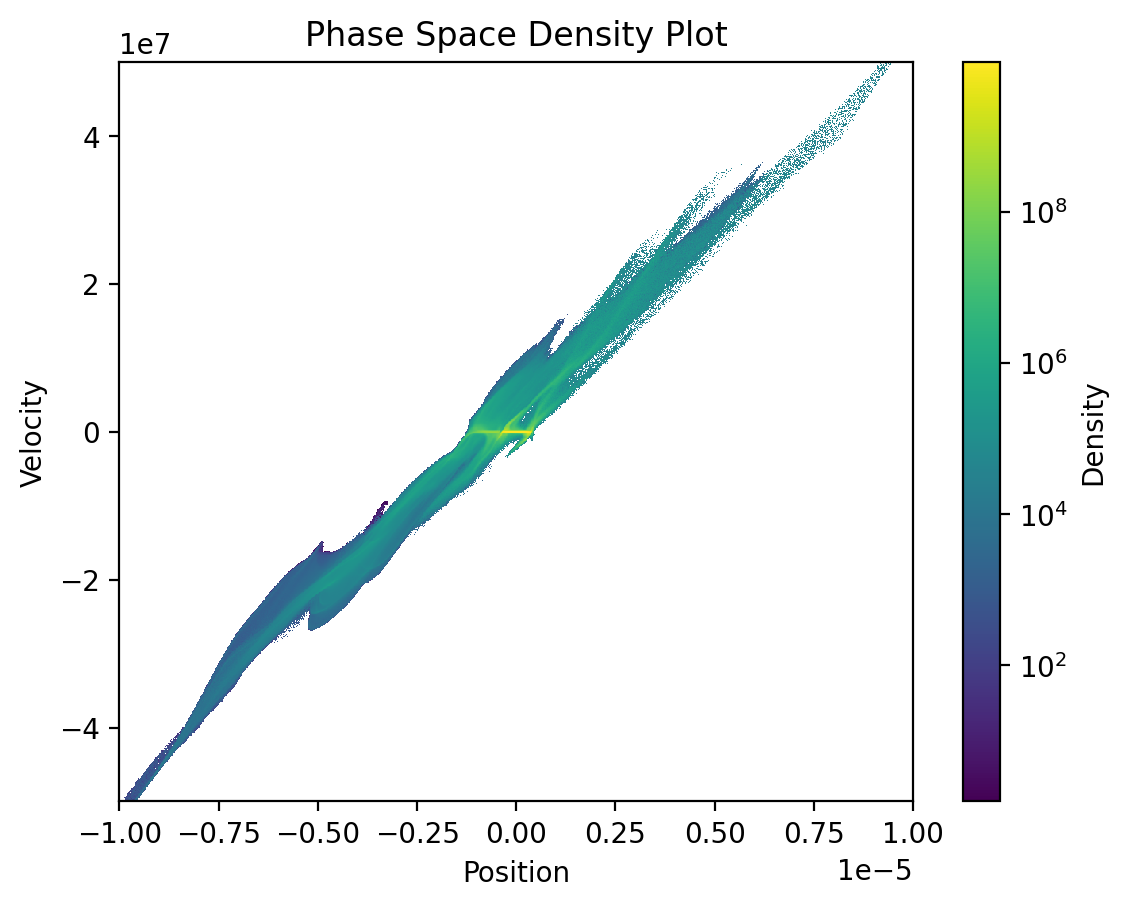

In [35]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

# Create the phase space density plot
# hist_data, _, _ = np.histogram2d(
#                 x, vx, weights=weight, range=[[-1e-5, 1e-5], [-5e7, 5e7]], bins=1000, normed=False
#             )
fig, ax = plt.subplots()
hist = ax.hist2d(
    x, vx, weights=weight, range=[[-1e-5, 1e-5], [-5e7, 5e7]], bins=1000, norm=LogNorm()
    # hist_data.T + 1,
    # extent=[-1e-5, 1e-5, -5e7, 5e7],
    # aspect='auto',
    # origin='lower',
    # norm=LogNorm(),
    # cmap='inferno'
)
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Phase Space Density Plot')

# Add a colorbar legend
cbar = fig.colorbar(hist[3], ax=ax)
cbar.ax.set_ylabel('Density')

plt.show()

In [36]:
media_folder

'/users/PAS2137/wang15032/EpochSims/data/2023-08-10_3D_8CB_800nm_1e21_22deg/media'

In [5]:
import sdf 

pmovie = sdf.read(os.path.join(epoch_output_dir, 'pmovie_0276.sdf'))

In [8]:
pmovie.Grid_Particles_subset_CarbonPMovie_Carbon.data

(array([-2.9000184e-06, -2.8813520e-06, -2.8295021e-06, ...,
        -3.6219074e-06, -3.7168843e-06, -3.7678353e-06], dtype=float32),
 array([-8.48111449e-06, -8.50705419e-06, -8.53663823e-06, ...,
         1.23530926e-05,  1.26241475e-05,  1.27869662e-05], dtype=float32),
 array([-8.4809935e-06, -8.4865296e-06, -8.5913643e-06, ...,
         7.7400855e-06,  7.7401182e-06,  7.7400709e-06], dtype=float32))